<a href="https://colab.research.google.com/github/amelianrrzqa/121_Amelia-Nur-Rizqa_Data-Mining_Posttest2/blob/main/121_Amelia_Nur_Rizqa_Posttest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [106]:
dfb = pd.read_csv('dataset_market_basket_baru.csv')
dfb

,whole milk,pastry,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegetables,canned beer,misc. beverages,...,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# 1 Item set berapa banyak item muncul
dfb.sum()

whole milk              5.0
 pastry                 1.0
 salty snack            1.0
 sausage                4.0
 semi-finished bread    1.0
 yogurt                 1.0
 soda                   2.0
 pickled vegetables     3.0
 canned beer            1.0
 misc. beverages        1.0
 hygiene articles       0.0
 rolls/buns             4.0
 frankfurter            2.0
 whipped/sour cream     1.0
 curd                   1.0
beef                    1.0
white bread             1.0
butter                  2.0
 frozen vegetables      1.0
 other vegetables       1.0
tropical fruit          1.0
 sugar                  0.0
 butter milk            1.0
 specialty chocolate    2.0
 frozen meals           1.0
 dental care            0.0
 root vegetables        1.0
 detergent              1.0
 dish cleaner           1.0
 cling film/bags        1.0
dtype: float64

In [21]:
# Itemnya ada apa aja isi kolom
dfb.columns

Index(['whole milk', ' pastry', ' salty snack', ' sausage',
       ' semi-finished bread', ' yogurt', ' soda', ' pickled vegetables',
       ' canned beer', ' misc. beverages', ' hygiene articles', ' rolls/buns',
       ' frankfurter', ' whipped/sour cream', ' curd', 'beef', 'white bread',
       'butter', ' frozen vegetables', ' other vegetables', 'tropical fruit',
       ' sugar', ' butter milk', ' specialty chocolate', ' frozen meals',
       ' dental care', ' root vegetables', ' detergent', ' dish cleaner',
       ' cling film/bags'],
      dtype='object')

In [22]:
# 2 Item set
from itertools import permutations #library buat kombinasi barang
 
# Extract unique items.
rules = list(permutations(dfb.columns, 2))
rules

[('whole milk', ' pastry'),
 ('whole milk', ' salty snack'),
 ('whole milk', ' sausage'),
 ('whole milk', ' semi-finished bread'),
 ('whole milk', ' yogurt'),
 ('whole milk', ' soda'),
 ('whole milk', ' pickled vegetables'),
 ('whole milk', ' canned beer'),
 ('whole milk', ' misc. beverages'),
 ('whole milk', ' hygiene articles'),
 ('whole milk', ' rolls/buns'),
 ('whole milk', ' frankfurter'),
 ('whole milk', ' whipped/sour cream'),
 ('whole milk', ' curd'),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', ' frozen vegetables'),
 ('whole milk', ' other vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', ' sugar'),
 ('whole milk', ' butter milk'),
 ('whole milk', ' specialty chocolate'),
 ('whole milk', ' frozen meals'),
 ('whole milk', ' dental care'),
 ('whole milk', ' root vegetables'),
 ('whole milk', ' detergent'),
 ('whole milk', ' dish cleaner'),
 ('whole milk', ' cling film/bags'),
 (' pastry', 'whole milk'),
 (' p

In [23]:
# Filter yang ada item kombinasi yang muncul isinya aja yang dihitung
rule_baru = []
for rule in rules:
  # Memfilter dengan nama kolom
  if len(dfb[(dfb[rule[0]]==1) & (dfb[rule[1]]==1)]) >0: #len untuk menghitung banyaknya data
    rule_baru.append(rule)
rule_baru

[('whole milk', ' pastry'),
 ('whole milk', ' salty snack'),
 ('whole milk', ' sausage'),
 ('whole milk', ' semi-finished bread'),
 ('whole milk', ' yogurt'),
 ('whole milk', ' pickled vegetables'),
 ('whole milk', ' rolls/buns'),
 ('whole milk', 'butter'),
 (' pastry', 'whole milk'),
 (' pastry', ' salty snack'),
 (' salty snack', 'whole milk'),
 (' salty snack', ' pastry'),
 (' sausage', 'whole milk'),
 (' sausage', ' semi-finished bread'),
 (' sausage', ' yogurt'),
 (' sausage', ' pickled vegetables'),
 (' sausage', ' rolls/buns'),
 (' semi-finished bread', 'whole milk'),
 (' semi-finished bread', ' sausage'),
 (' semi-finished bread', ' yogurt'),
 (' yogurt', 'whole milk'),
 (' yogurt', ' sausage'),
 (' yogurt', ' semi-finished bread'),
 (' soda', ' pickled vegetables'),
 (' soda', ' frankfurter'),
 (' soda', ' whipped/sour cream'),
 (' pickled vegetables', 'whole milk'),
 (' pickled vegetables', ' sausage'),
 (' pickled vegetables', ' soda'),
 (' canned beer', ' misc. beverages'),

In [24]:
hitung = {} #Ganti dictionary
for rule in rule_baru:
  banyak_data= len(dfb[
      (dfb[rule[0]]==1) & (dfb[rule[1]]==1)
      ])
  hitung[str(rule)] = banyak_data

hitung

{"('whole milk', ' pastry')": 1,
 "('whole milk', ' salty snack')": 1,
 "('whole milk', ' sausage')": 2,
 "('whole milk', ' semi-finished bread')": 1,
 "('whole milk', ' yogurt')": 1,
 "('whole milk', ' pickled vegetables')": 1,
 "('whole milk', ' rolls/buns')": 1,
 "('whole milk', 'butter')": 1,
 "(' pastry', 'whole milk')": 1,
 "(' pastry', ' salty snack')": 1,
 "(' salty snack', 'whole milk')": 1,
 "(' salty snack', ' pastry')": 1,
 "(' sausage', 'whole milk')": 2,
 "(' sausage', ' semi-finished bread')": 1,
 "(' sausage', ' yogurt')": 1,
 "(' sausage', ' pickled vegetables')": 1,
 "(' sausage', ' rolls/buns')": 2,
 "(' semi-finished bread', 'whole milk')": 1,
 "(' semi-finished bread', ' sausage')": 1,
 "(' semi-finished bread', ' yogurt')": 1,
 "(' yogurt', 'whole milk')": 1,
 "(' yogurt', ' sausage')": 1,
 "(' yogurt', ' semi-finished bread')": 1,
 "(' soda', ' pickled vegetables')": 1,
 "(' soda', ' frankfurter')": 1,
 "(' soda', ' whipped/sour cream')": 1,
 "(' pickled vegetabl

In [25]:
len(dfb)

19

In [26]:
# List support
# supp = [i/len(dfb)*100 for i in hitung.values()]
# print(supp)


print("---")
for item,ab in hitung.items():
  print(f"{item} support = {ab/len(dfb)*100}%")

---
('whole milk', ' pastry') support = 5.263157894736842%
('whole milk', ' salty snack') support = 5.263157894736842%
('whole milk', ' sausage') support = 10.526315789473683%
('whole milk', ' semi-finished bread') support = 5.263157894736842%
('whole milk', ' yogurt') support = 5.263157894736842%
('whole milk', ' pickled vegetables') support = 5.263157894736842%
('whole milk', ' rolls/buns') support = 5.263157894736842%
('whole milk', 'butter') support = 5.263157894736842%
(' pastry', 'whole milk') support = 5.263157894736842%
(' pastry', ' salty snack') support = 5.263157894736842%
(' salty snack', 'whole milk') support = 5.263157894736842%
(' salty snack', ' pastry') support = 5.263157894736842%
(' sausage', 'whole milk') support = 10.526315789473683%
(' sausage', ' semi-finished bread') support = 5.263157894736842%
(' sausage', ' yogurt') support = 5.263157894736842%
(' sausage', ' pickled vegetables') support = 5.263157894736842%
(' sausage', ' rolls/buns') support = 10.5263157894

In [29]:
dfb["whole milk"].sum()

5.0

In [30]:
# List Confidens
# print([ab/df[kolom[0]].sum()*100 for ab,kolom in zip(hitung,rules)])

print("---")
for item,ab in hitung.items():
  #"A->B"
  i = eval(item) #eval Ubah ke list dari string 
  print(f"{i[0]}->{i[1]}  Confidence = {ab/dfb[i[0]].sum()*100}%")

---
whole milk-> pastry  Confidence = 20.0%
whole milk-> salty snack  Confidence = 20.0%
whole milk-> sausage  Confidence = 40.0%
whole milk-> semi-finished bread  Confidence = 20.0%
whole milk-> yogurt  Confidence = 20.0%
whole milk-> pickled vegetables  Confidence = 20.0%
whole milk-> rolls/buns  Confidence = 20.0%
whole milk->butter  Confidence = 20.0%
 pastry->whole milk  Confidence = 100.0%
 pastry-> salty snack  Confidence = 100.0%
 salty snack->whole milk  Confidence = 100.0%
 salty snack-> pastry  Confidence = 100.0%
 sausage->whole milk  Confidence = 50.0%
 sausage-> semi-finished bread  Confidence = 25.0%
 sausage-> yogurt  Confidence = 25.0%
 sausage-> pickled vegetables  Confidence = 25.0%
 sausage-> rolls/buns  Confidence = 50.0%
 semi-finished bread->whole milk  Confidence = 100.0%
 semi-finished bread-> sausage  Confidence = 100.0%
 semi-finished bread-> yogurt  Confidence = 100.0%
 yogurt->whole milk  Confidence = 100.0%
 yogurt-> sausage  Confidence = 100.0%
 yogurt-> 

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

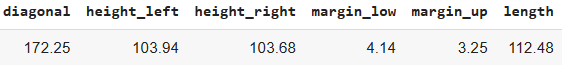
<!-- 1412 -->

In [95]:
# 1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi
import pandas as pd
import numpy as np

dfup = pd.read_csv('deteksi_uang_palsu.csv')

#Memisahkan fitur dan target
x = dfup.iloc[:, :-1]
y = dfup.iloc[:, -1]

#Memisahkan jarak dari setiap data point ke target  prediksi
distances = np.sqrt(np.sum((x - y.values.reshape(-1, 1)) ** 2, axis=1))
dfup['Jarak'] = distances

#Menyimpan hasil ke file csv
dfup.to_csv('hasil_jarak.csv', index=False)
dfup

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,Jarak
0,True,172.06,104.24,103.66,4.24,3.10,113.02,200.285783
1,True,171.66,103.68,103.41,4.35,3.33,113.74,201.070850
2,True,172.23,104.00,103.35,4.43,2.95,113.12,200.485558
3,True,172.07,104.21,103.82,4.29,3.35,113.30,200.524023
4,True,171.79,104.57,104.04,4.26,3.15,113.46,200.774364
5,False,172.00,104.23,104.52,5.76,3.37,110.94,196.866414
6,False,171.56,104.03,103.93,5.47,3.50,111.67,197.874877
7,False,171.90,104.33,104.40,4.70,3.31,112.12,199.106750
8,False,171.84,104.06,104.10,4.87,3.25,111.04,197.520021
9,False,172.11,104.14,104.15,4.84,3.28,110.98,197.514206


In [103]:
# 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)

dfup = pd.read_csv('deteksi_uang_palsu.csv')

#Memisahkan fitur dan target
x = dfup.iloc[:, :-1]
y = dfup.iloc[:, -1]

#Memisahkan jarak dari setiap data point ke target  prediksi
distances = np.sqrt(np.sum((x - y.values.reshape(-1, 1)) ** 2, axis=1))

#Mengambil K jarak 
K =int(np.sqrt(len(dfup)))
indices = np.argsort(distances)[:K]

#Mengurutkan data berdasarkan K jarak
dfup_sorted = dfup.iloc[indices].reset_index(drop=True)

#Menyimpan hasil ke file csv
dfup_sorted.to_csv('sored.csv',  index=False)

#Hasil file csv dari penambahan kolom jarak
dfup_sorted = pd.read_csv('sored.csv')
dfup_sorted

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,False,172.00,104.23,104.52,5.76,3.37,110.94
1,False,172.11,104.14,104.15,4.84,3.28,110.98
2,False,171.84,104.06,104.10,4.87,3.25,111.04


In [104]:
# 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak

#Load datase
dfup = pd.read_csv('deteksi_uang_palsu.csv')

#Hitung jumlah masing2 label
label_counts = dfup["is_genuine"].value_counts()

#Tampilkan label terbanyak
print("Label terbanyak adalah", label_counts.idxmax())

Label terbanyak adalah True


# (3) Analisis

> Nama : Amelia Nur Rizqa

> Nim : 2109116121

Link dataset : https://www.kaggle.com/datasets/prasertk/healthy-lifestyle-cities-report-2021

Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

## Business Understanding & Data Understanding

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
from google.colab import files
import io
import numpy as np

In [4]:
dfh = pd.read_csv("healthy_lifestyle_city_2021.csv")
dfh

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53
5,Helsinki,6,1662,£1.60,22.20%,80.4,13.08,1540,7.80,113,309,£35.23
6,Fukuoka,7,2769,£0.78,4.30%,83.2,-,1644,5.87,35,539,£55.87
7,Berlin,8,1626,£1.55,22.30%,80.6,39.41,1386,7.07,254,1729,£26.11
8,Barcelona,9,2591,£1.19,23.80%,82.2,65.19,1686,6.40,585,2344,£37.80
9,Vancouver,10,1938,£1.08,29.40%,81.7,24.26,1670,7.23,218,788,£31.04


### Business Understanding

### Data Understanding

In [ ]:
# dfh1 isinya dataset dengan label target 78.8
dfh1 = dfh[(dfh['Life expectancy(years) (Country)'] == 78.8)]
dfh1

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
24,Los Angeles,25,3254,£1.52,36.20%,78.8,66.07,1779,6.94,223,1439,£32.00
26,Boston,27,2634,£1.39,36.20%,78.8,27.03,1779,6.94,88,588,£46.27
29,Chicago,30,2508,£1.20,36.20%,78.8,43.33,1779,6.94,171,1320,£41.14
33,San Francisco,34,3062,£1.60,36.20%,78.8,47.36,1779,6.94,242,1031,£65.13
40,"Washington, D.C.",41,2528,£1.45,36.20%,78.8,39.18,1779,6.94,83,744,£65.99
41,New York,42,2535,£1.32,36.20%,78.8,57.36,1779,6.94,359,3081,£64.66


In [ ]:
# dfh2 dengan label bukan 78.8
#Memilih Data dengan Nilai Tidak Sama Dengan
dfh2 = dfh[dfh['Life expectancy(years) (Country)'] != 78.8] 
dfh2

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53
5,Helsinki,6,1662,£1.60,22.20%,80.4,13.08,1540,7.80,113,309,£35.23
6,Fukuoka,7,2769,£0.78,4.30%,83.2,-,1644,5.87,35,539,£55.87
7,Berlin,8,1626,£1.55,22.30%,80.6,39.41,1386,7.07,254,1729,£26.11
8,Barcelona,9,2591,£1.19,23.80%,82.2,65.19,1686,6.40,585,2344,£37.80
9,Vancouver,10,1938,£1.08,29.40%,81.7,24.26,1670,7.23,218,788,£31.04


In [ ]:
# dfh3 dengan tabel untuk Outdoor activities(City) dibawah 100
dfh3 = dfh[dfh["Outdoor activities(City)"] < 100 ]
dfh3

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
6,Fukuoka,7,2769,£0.78,4.30%,83.2,-,1644,5.87,35,539,£55.87
18,Frankfurt,19,1662,£1.95,22.30%,80.6,37.78,1386,7.07,23,551,£39.01
19,Geneva,20,-,£2.62,19.50%,82.6,27.25,1557,7.56,44,444,£70.00
26,Boston,27,2634,£1.39,36.20%,78.8,27.03,1779,6.94,88,588,£46.27
32,Brussels,33,1546,£2.11,22.10%,80.4,62.67,1583,6.86,55,988,£25.34
36,Zurich,37,1566,£3.20,19.50%,82.6,17.31,1557,7.56,69,538,£73.11
40,"Washington, D.C.",41,2528,£1.45,36.20%,78.8,39.18,1779,6.94,83,744,£65.99


In [ ]:
# df4 untuk Life expectancy(years) (Country) yang statusnya itu 78.8
dfh4 = dfh[dfh['Life expectancy(years) (Country)'] == 78.8]
dfh4

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
24,Los Angeles,25,3254,£1.52,36.20%,78.8,66.07,1779,6.94,223,1439,£32.00
26,Boston,27,2634,£1.39,36.20%,78.8,27.03,1779,6.94,88,588,£46.27
29,Chicago,30,2508,£1.20,36.20%,78.8,43.33,1779,6.94,171,1320,£41.14
33,San Francisco,34,3062,£1.60,36.20%,78.8,47.36,1779,6.94,242,1031,£65.13
40,"Washington, D.C.",41,2528,£1.45,36.20%,78.8,39.18,1779,6.94,83,744,£65.99
41,New York,42,2535,£1.32,36.20%,78.8,57.36,1779,6.94,359,3081,£64.66


In [ ]:
dfh.info

<bound method DataFrame.info of                 City  Rank Sunshine hours(City)  \
0          Amsterdam     1                 1858   
1             Sydney     2                 2636   
2             Vienna     3                 1884   
3          Stockholm     4                 1821   
4         Copenhagen     5                 1630   
5           Helsinki     6                 1662   
6            Fukuoka     7                 2769   
7             Berlin     8                 1626   
8          Barcelona     9                 2591   
9          Vancouver    10                 1938   
10         Melbourne    11                 2363   
11           Beijing    12                 2671   
12           Bangkok    13                 2624   
13      Buenos Aires    14                 2525   
14           Toronto    15                 2066   
15            Madrid    16                 2769   
16           Jakarta    17                 2983   
17             Seoul    18                 2066   

#### Explore Data

##### Visualisasi Comparison

<Axes: xlabel='count', ylabel='Life expectancy(years) (Country)'>

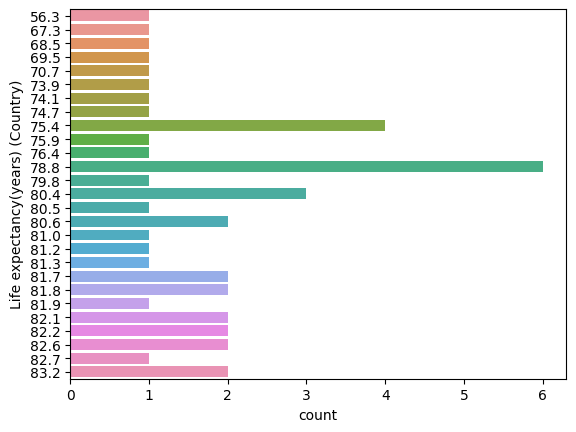

In [ ]:
# Menampilkan visualisi berapa banyakLife expectancy(years) (Country)
sns.countplot(data=dfh,y="Life expectancy(years) (Country)")

<Axes: xlabel='Count', ylabel='Annual avg. hours worked'>

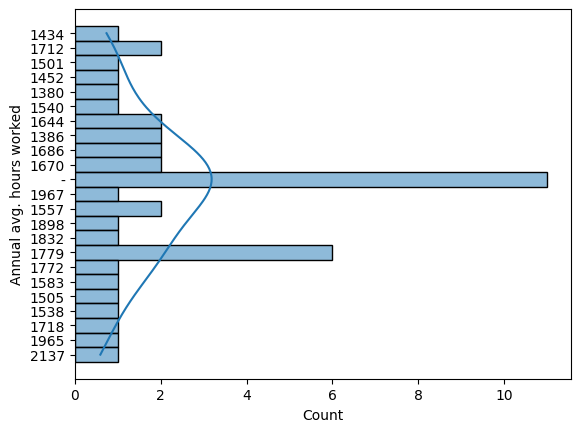

In [ ]:
# Menampilkan visualisi berapa banyak Annual avg. hours worked berdasarkan kategori-kategorinya 
sns.histplot(data=dfh,y='Annual avg. hours worked', kde=True)

<Axes: xlabel='count', ylabel='Annual avg. hours worked'>

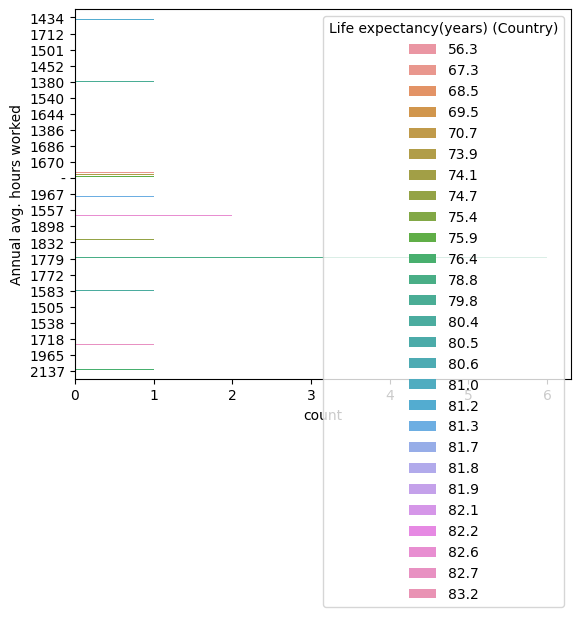

In [ ]:
# Menampilkan berapa banyak Annual avg. hours worked berdasarkan Life expectancy(years) (Country)
sns.countplot(data=dfh,y="Annual avg. hours worked", hue="Life expectancy(years) (Country)")

##### Visualisasi Distribution


<Axes: xlabel='Count', ylabel='Annual avg. hours worked'>

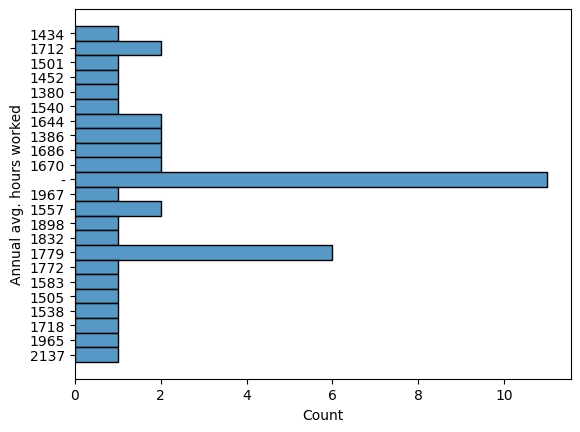

In [ ]:
# BHistorgram untuk Annual avg. hours worked
sns.histplot(data=dfh,y="Annual avg. hours worked")

<Axes: xlabel='Life expectancy(years) (Country)', ylabel='Count'>

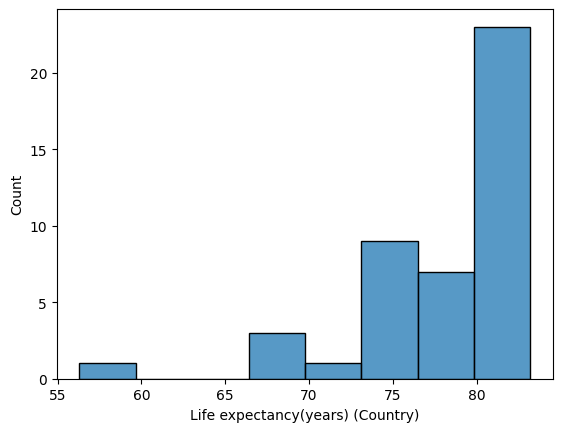

In [ ]:
sns.histplot(data=dfh,x="Life expectancy(years) (Country)")

<Axes: xlabel='Life expectancy(years) (Country)'>

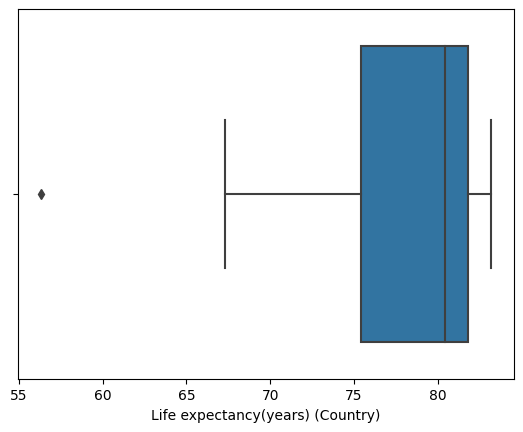

In [ ]:
# Boxplot untuk Life expectancy(years) (Country)
sns.boxplot(data=dfh,x="Life expectancy(years) (Country)")

##### Visualisasi Relationship

<Axes: xlabel='Life expectancy(years) (Country)', ylabel='Annual avg. hours worked'>

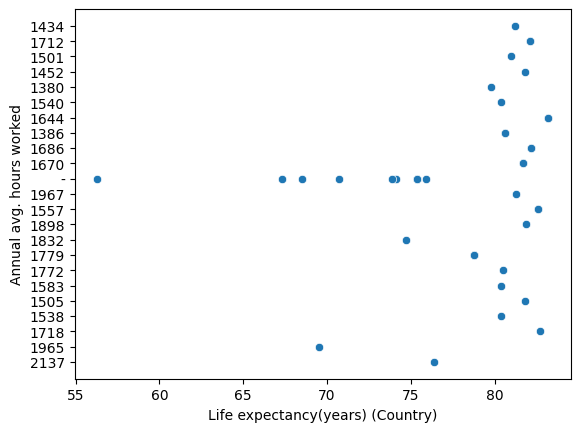

In [ ]:
# Buat scatterplot untuk Life expectancy(years) (Country) dan Annual avg. hours worked 
sns.scatterplot(data=dfh,x="Life expectancy(years) (Country)",y="Annual avg. hours worked")

##### Visualisasi Composition

In [ ]:
import plotly.express as px

In [ ]:
# Buat pieplot untuk Annual avg. hours worked
px.pie(dfh,names="Annual avg. hours worked")

### Data Preparation


In [10]:
dfh5.isna().sum()

Rank                                             0
Life expectancy(years) (Country)                 0
Happiness levels(Country)                        0
Outdoor activities(City)                         0
Number of take out places(City)                  0
                                                ..
Cost of a monthly gym membership(City)_£65.13    0
Cost of a monthly gym membership(City)_£65.99    0
Cost of a monthly gym membership(City)_£70.00    0
Cost of a monthly gym membership(City)_£70.82    0
Cost of a monthly gym membership(City)_£73.11    0
Length: 267, dtype: int64

In [17]:
# Encoding
# Merubah tipe data string/kategori menjadi numerik
dfh5 = pd.get_dummies(dfh)
dfh5

,Rank,Life expectancy(years) (Country),Happiness levels(Country),Outdoor activities(City),Number of take out places(City),City_Amsterdam,City_Bangkok,City_Barcelona,City_Beijing,City_Berlin,...,Cost of a monthly gym membership(City)_£53.49,Cost of a monthly gym membership(City)_£55.87,Cost of a monthly gym membership(City)_£57.95,Cost of a monthly gym membership(City)_£58.31,Cost of a monthly gym membership(City)_£64.66,Cost of a monthly gym membership(City)_£65.13,Cost of a monthly gym membership(City)_£65.99,Cost of a monthly gym membership(City)_£70.00,Cost of a monthly gym membership(City)_£70.82,Cost of a monthly gym membership(City)_£73.11
0,1,81.2,7.44,422,1048,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,82.1,7.22,406,1103,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,81.0,7.29,132,1008,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,81.8,7.35,129,598,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,79.8,7.64,154,523,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,80.4,7.80,113,309,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,83.2,5.87,35,539,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,8,80.6,7.07,254,1729,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,82.2,6.40,585,2344,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,81.7,7.23,218,788,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
TARGET = dfh5.City_Amsterdam #Kolom penentu target prediksi
data = dfh5.drop(columns=["City_Amsterdam"])

In [15]:
sample = data.sample()

In [16]:
sample 

,Rank,Life expectancy(years) (Country),Happiness levels(Country),Outdoor activities(City),Number of take out places(City),City_Bangkok,City_Barcelona,City_Beijing,City_Berlin,City_Boston,...,Cost of a monthly gym membership(City)_£53.49,Cost of a monthly gym membership(City)_£55.87,Cost of a monthly gym membership(City)_£57.95,Cost of a monthly gym membership(City)_£58.31,Cost of a monthly gym membership(City)_£64.66,Cost of a monthly gym membership(City)_£65.13,Cost of a monthly gym membership(City)_£65.99,Cost of a monthly gym membership(City)_£70.00,Cost of a monthly gym membership(City)_£70.82,Cost of a monthly gym membership(City)_£73.11
18,19,80.6,7.07,23,551,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Algoritma Naive Bayes dan Preprocessing (pengenalan)

In [ ]:
dfh

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53
5,Helsinki,6,1662,£1.60,22.20%,80.4,13.08,1540,7.80,113,309,£35.23
6,Fukuoka,7,2769,£0.78,4.30%,83.2,-,1644,5.87,35,539,£55.87
7,Berlin,8,1626,£1.55,22.30%,80.6,39.41,1386,7.07,254,1729,£26.11
8,Barcelona,9,2591,£1.19,23.80%,82.2,65.19,1686,6.40,585,2344,£37.80
9,Vancouver,10,1938,£1.08,29.40%,81.7,24.26,1670,7.23,218,788,£31.04


In [ ]:
dfh_baru = pd.read_csv("healthy_lifestyle_city_2021.csv")
dfh_baru.drop(columns=["Cost of a bottle of water(City)","Obesity levels(Country)", "Number of take out places(City)", "Cost of a monthly gym membership(City)"], inplace=True)
dfh_baru

,City,Rank,Sunshine hours(City),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City)
0,Amsterdam,1,1858,81.2,30.93,1434,7.44,422
1,Sydney,2,2636,82.1,26.86,1712,7.22,406
2,Vienna,3,1884,81.0,17.33,1501,7.29,132
3,Stockholm,4,1821,81.8,19.63,1452,7.35,129
4,Copenhagen,5,1630,79.8,21.24,1380,7.64,154
5,Helsinki,6,1662,80.4,13.08,1540,7.80,113
6,Fukuoka,7,2769,83.2,-,1644,5.87,35
7,Berlin,8,1626,80.6,39.41,1386,7.07,254
8,Barcelona,9,2591,82.2,65.19,1686,6.40,585
9,Vancouver,10,1938,81.7,24.26,1670,7.23,218
